In [1]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn import datasets#telechergre les bases de donnes qui existe dans sklearn
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import joblib

In [2]:
mnist = datasets.load_digits()#ils ont pris qu'une petite portion de la base de donnes originale
mnist.data.shape

(1797, 64)

In [3]:
print(mnist.data[0].shape)
print(mnist.data[0])
print("label : %i"%mnist.target[0])

(64,)
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
label : 0


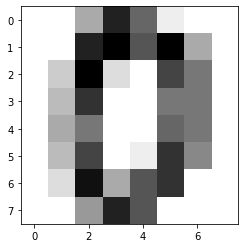

In [4]:
plt.figure(figsize=(20,4))
plt.imshow(np.reshape(mnist.data[0],(8,8)),cmap='gray_r')

In [5]:
#plt.figure(figsize=(20,4))
#for index,(image,label) in enumerate(zip(mnist.data[0:5],(mnist.target[0:5])):
            #plt.imshow(np.reshape(image,(8,8)),cmap='gray_r')) 
                                                                   

In [6]:
(traindata, testdata, trainlabels, testlabeles)= train_test_split(mnist.data, mnist.target, test_size=0.25,random_state=0)
print(traindata.shape)
print(trainlabels.shape)
print(testdata.shape)
print(testlabeles.shape)
print("count of digits in dataset",Counter(trainlabels))

(1347, 64)
(1347,)
(450, 64)
(450,)
count of digits in dataset Counter({4: 143, 0: 141, 1: 139, 3: 138, 5: 134, 2: 133, 9: 133, 7: 131, 6: 129, 8: 126})


In [7]:
(traindata, valdata, trainlabels, vallabeles)= train_test_split(traindata, trainlabels, test_size=0.1,random_state=0)

In [8]:
print("training data apoints : {} ".format(len(traindata)))
print("val data apoints : {} ".format(len(valdata)))
print("test data apoints : {} ".format(len(testdata)))

training data apoints : 1212 
val data apoints : 135 
test data apoints : 450 


In [9]:
kvals=range(1,10,2)
accuracies=[]

In [10]:
#evaluation de modele sur differents valeur de k
for k in kvals:
    #entrainement
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(traindata,trainlabels)
    #evaluation de modele
    score = model.score(valdata,vallabeles)
    print("K=%f , accuracy=%.2f%%" % (k,score*100))
    accuracies.append(score)

K=1.000000 , accuracy=100.00%
K=3.000000 , accuracy=100.00%
K=5.000000 , accuracy=100.00%
K=7.000000 , accuracy=99.26%
K=9.000000 , accuracy=99.26%


In [11]:
#entrainer le modele sur le best valeur of k
i = np.argmax(accuracies)
best_model = KNeighborsClassifier(n_neighbors=kvals[i])
model.fit(traindata,trainlabels)

KNeighborsClassifier(n_neighbors=9)

In [15]:
predictions = model.predict(testdata)

In [13]:
#evaluation de model pour chaque classe
print(classification_report(testlabeles,predictions))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        37
           1       0.96      1.00      0.98        43
           2       1.00      0.95      0.98        44
           3       0.96      1.00      0.98        45
           4       1.00      0.97      0.99        38
           5       0.98      0.98      0.98        48
           6       1.00      1.00      1.00        52
           7       0.94      1.00      0.97        48
           8       1.00      0.90      0.95        48
           9       0.98      0.98      0.98        47

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



In [16]:
joblib.dump(model,'KNN_digits.pkl', compress= 3)

['KNN_digits.pkl']